<a href="https://colab.research.google.com/github/areesha-del/AI-ML-Hands-on/blob/main/Week_2%2Cday(3)_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERVISED LEARNING USING DESCRETE DATASET**

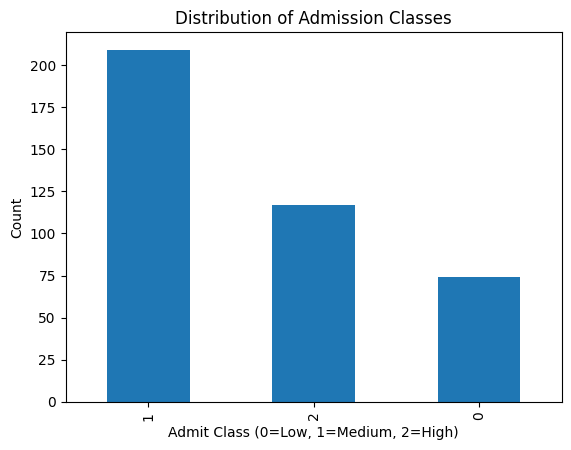

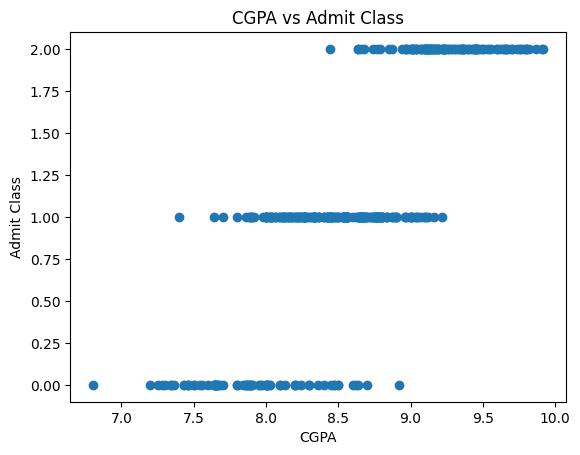

Random Forest Classification Accuracy: 0.8375


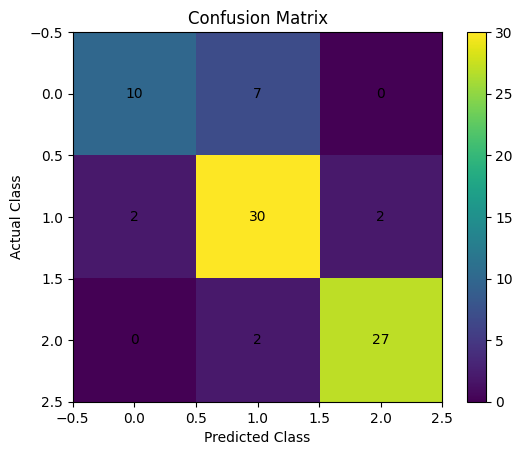

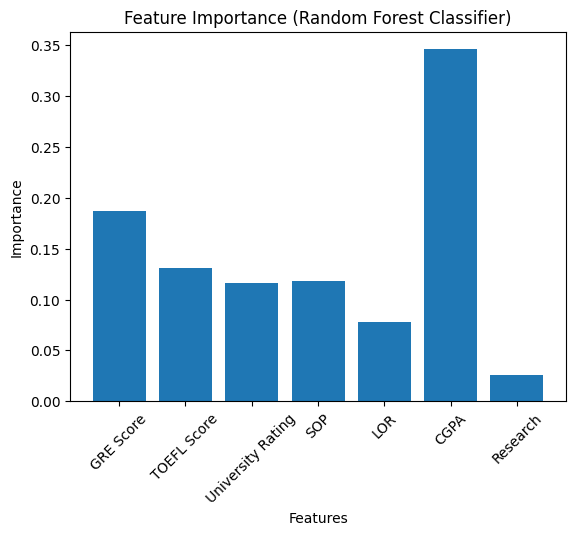

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# ==============================
# Load Dataset
# ==============================
df = pd.read_csv("/content/Admission (1).csv")
df.columns = df.columns.str.strip()
df.drop(columns=["Serial No."], inplace=True)

# ==============================
# Convert Continuous Target → Discrete
# ==============================
def admit_category(x):
    if x <= 0.6:
        return 0   # Low
    elif x <= 0.8:
        return 1   # Medium
    else:
        return 2   # High

df["Admit_Class"] = df["Chance of Admit"].apply(admit_category)

# ==============================
# 1. EDA (Visualization)
# ==============================

# Class distribution
plt.figure()
df["Admit_Class"].value_counts().plot(kind="bar")
plt.xlabel("Admit Class (0=Low, 1=Medium, 2=High)")
plt.ylabel("Count")
plt.title("Distribution of Admission Classes")
plt.show()

# CGPA vs Admit Class
plt.figure()
plt.scatter(df["CGPA"], df["Admit_Class"])
plt.xlabel("CGPA")
plt.ylabel("Admit Class")
plt.title("CGPA vs Admit Class")
plt.show()

# ==============================
# 2. Preprocessing
# ==============================
X = df.drop(columns=["Chance of Admit", "Admit_Class"])
y = df["Admit_Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 3. Train Classification Model
# ==============================
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ==============================
# 4. Accuracy
# ==============================
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classification Accuracy:", accuracy)

# ==============================
# 5. Confusion Matrix Visualization
# ==============================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

# ==============================
# 6. Feature Importance Visualization
# ==============================
plt.figure()
plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()
